<a href="https://colab.research.google.com/github/madhumithasuresh-06/MachineLearningProjects/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAN PREDICTION --> SUPPORT VECTOR MACHINE

IMPORTING DEPENDANCIES

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

DATA COLLECTION AND PREPROCESSING

In [53]:

loan_data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
loan_data.shape

(614, 13)

In [55]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [56]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Dropping missing values

In [57]:
loan_data=loan_data.dropna()

In [58]:
loan_data.shape

(480, 13)

LABEL ENCODING

In [59]:
loan_data['Loan_Status'].value_counts()

,count
Loan_Status,
Y,332
N,148


In [60]:
label_encode=LabelEncoder()
labels=label_encode.fit_transform(loan_data.Loan_Status)
loan_data.Loan_Status=labels


In [61]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


Visualise Education and loan status

<Axes: xlabel='Education', ylabel='count'>

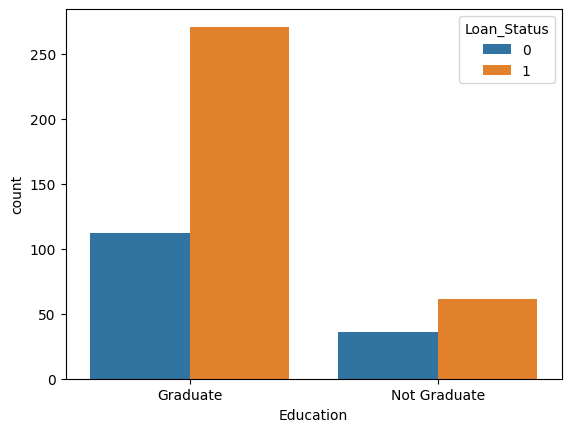

In [62]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_data)

Replacing all categorical value into numerical values

In [63]:
loan_data=loan_data.replace(to_replace='3+',value=4)
loan_data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [64]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [65]:
loan_data['Gender'].value_counts()


,count
Gender,
Male,394
Female,86


In [66]:
loan_data['Married'].value_counts()


,count
Married,
Yes,311
No,169


In [67]:

loan_data['Education'].value_counts()


,count
Education,
Graduate,383
Not Graduate,97


In [68]:
loan_data['Self_Employed'].value_counts()


,count
Self_Employed,
No,414
Yes,66


In [69]:
loan_data['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


In [70]:
l=loan_data.replace({'Gender':{'Male':0,'Female':1},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':2,'Semiurban':1}})
loan_data=l
loan_data.head()

/tmp/ipython-input-2447188186.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  l=loan_data.replace({'Gender':{'Male':0,'Female':1},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':2,'Semiurban':1}})


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Seperating the data and label

In [71]:
x=loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_data['Loan_Status']

Train test split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [73]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


Train the model

In [74]:
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation :Accuracy on Training Data

In [75]:
training_prediction=classifier.predict(x_train)
training_accuracy=accuracy_score(training_prediction,y_train)
print("Accuracy on Training data:",training_accuracy)

Accuracy on Training data: 0.7476851851851852


In [76]:
test_prediction=classifier.predict(x_test)
test_accuracy=accuracy_score(test_prediction,y_test)
print("Accuracy on test data:",test_accuracy)

Accuracy on test data: 0.8333333333333334
